In [1]:
import ImageGrab
import time
import timeit
import math
import os
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

In [2]:
def screenGrab(box):
    return ImageGrab.grab(box)

In [3]:
def getOrigin(im):
    for x in xrange(len(im)):
        if not np.all([np.array_equal(i, [0,0,0,255]) for i in im_t[x]]):
            origin_y = x
            break
    for x in xrange(len(im_t[0])):
        if not np.all([np.array_equal(i, [0,0,0,255]) for i in im_t[:,x]]):
            origin_x = x
            break
    return origin_x, origin_y

In [4]:
def getBox(x,y):
    x,y = y,x
    tl_x = origin_x + x*(WIDTH+INTERVAL)
    tl_y = origin_y + y*(WIDTH+INTERVAL)
    br_x = tl_x + WIDTH
    br_y = tl_y + WIDTH
    return tl_x, tl_y, br_x, br_y

In [5]:
# save images of number 1,2,4
def dataPreparation():
    tl_x, tl_y, br_x, br_y = getBox(0,3)
    sub_mat = im_t[tl_y:br_y,tl_x:br_x]
    np.save('data/1',sub_mat)
    tl_x, tl_y, br_x, br_y = getBox(1,3)
    sub_mat = im_t[tl_y:br_y,tl_x:br_x]
    np.save('data/2',sub_mat)
    tl_x, tl_y, br_x, br_y = getBox(2,3)
    sub_mat = im_t[tl_y:br_y,tl_x:br_x]
    np.save('data/4',sub_mat)

origin = 27 23


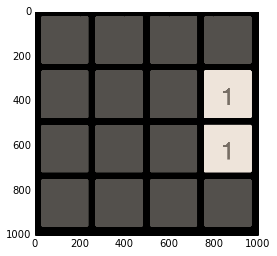

In [13]:
# initial graphic settings
BOX = (55,545,1055,1545)
WIDTH = 214
INTERVAL = 28
# position checking
im_t = np.asarray(screenGrab(BOX))
imshow(im_t)
# get origin_x, origin_y
origin_x, origin_y = getOrigin(im_t)
print 'origin =', origin_x, origin_y

In [12]:
# load saved images of number 1,2,4
n1 = np.load('data/1.npy')
n2 = np.load('data/2.npy')
n4 = np.load('data/4.npy')
# convert to list
n1_lst = []
for x in xrange(100,150):
    for y in xrange(100,150):
        n1_lst.append(sum(n1[x][y]))
n2_lst = []
for x in xrange(100,150):
    for y in xrange(100,150):
        n2_lst.append(sum(n2[x][y]))
n4_lst = []
for x in xrange(100,150):
    for y in xrange(100,150):
        n4_lst.append(sum(n4[x][y]))
        
def getNumber(im,x,y):
    tl_x, tl_y, br_x, br_y = getBox(x,y)
    sub_mat = im[tl_y:br_y,tl_x:br_x]
    lst = []
    for x in xrange(100,150):
        for y in xrange(100,150):
            lst.append(sum(sub_mat[x][y]))
    if np.corrcoef(lst,n1_lst)[1,0] > 0.9:
        return 1
    if np.corrcoef(lst,n2_lst)[1,0] > 0.9:
        return 2
    if np.corrcoef(lst,n4_lst)[1,0] > 0.9:
        return 4
    return 0

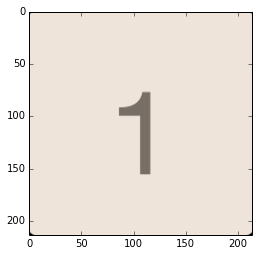

In [9]:
imshow(n1)

In [15]:
getNumber(im_t,1,3)

1

In [9]:
def left(lst):
    temp = filter(lambda x: x!=0,lst)
    for i in range(4):
        if i < len(temp):
            lst[i]=temp[i]
        else:
            lst[i]=0
def moveLeft(board):
    for x in board:
        if x[0]==x[1] and x[2]==x[3]:
            x[0]=x[0]*2
            x[1]=x[2]*2
            x[2]=0
            x[3]=0
            continue
        left(x)
        for i in range(3):
            if x[i]==x[i+1]:
                x[i]*=2
                x[i+1]=0
                left(x)
                break    
def moveRight(board):
    board = np.fliplr(board)
    moveLeft(board)
    board = np.fliplr(board)
def moveUp(board):
    board = np.rot90 (board)
    moveLeft(board)
    board = np.rot90 (board,3)
def moveDown(board):
    board = np.rot90 (board,3)
    moveLeft(board)
    board = np.rot90 (board)

In [13]:
def addNew(board):
    while True:
        x = np.random.randint(4)
        y = np.random.randint(4)
        if board[x][y] == 0:
            board[x][y] = np.random.randint(2)+1
            return

In [14]:
def endCheck(board):
    if not np.all(board.flatten()!=0):
        return False
    for x in range(4):
        for y in range(4):
            if y+1 < 4 and board[x][y]==board[x][y+1]:
                return False
            if x+1 < 4 and board[x][y]==board[x+1][y]:
                return False
    return True

In [34]:
def maxValue(board):
    return max(board.flatten())

# more zeros is better
# max value the larger the better
# adjunct box have closer value is better
def score(lastBoard, board):
    if np.array_equal(lastBoard,board):
        return -1000
    rst = 0
    rst += 5 * len(filter(lambda x: x ==0, board.flatten()))
    rst += 10 * math.log(maxValue(board),2)
    temp = np.log2(board+1)
    for x in range(4):
        for y in range(4):
            if y+1 < 4:
                rst -= abs(temp[x][y] - temp[x][y+1])
            if x+1 < 4:
                rst -= abs(temp[x][y] - temp[x+1][y])
            rst += temp[x][y]*temp[x][y]
    return rst

In [20]:
def AI(board,i):
    boardLeft = np.copy(board)
    moveLeft(boardLeft)
    boardRight = np.copy(board)
    moveRight(boardRight)
    boardUp = np.copy(board)
    moveUp(boardUp)
    boardDown = np.copy(board)
    moveDown(boardDown)
    if i == 1:
        scores = []
        scores.append(score(board,boardLeft))        
        scores.append(score(board,boardRight))
        scores.append(score(board,boardUp))
        scores.append(score(board,boardDown))
        return max(zip(range(4),scores), key=lambda x:x[1])[0]
    else:
        scores = []
        if np.array_equal(boardLeft,board):
            scores.append(-1000)
        else:
            #addNew(boardLeft)
            scores.append(AI(boardLeft,i-1)) 
        if np.array_equal(boardRight,board):
            scores.append(-1000)
        else:
            #addNew(boardRight)
            scores.append(AI(boardRight,i-1)) 
        if np.array_equal(boardUp,board):
            scores.append(-1000)
        else:
            #addNew(boardUp)
            scores.append(AI(boardUp,i-1)) 
        if np.array_equal(boardDown,board):
            scores.append(-1000)
        else:
            #addNew(boardDown)
            scores.append(AI(boardDown,i-1)) 
        return max(zip(range(4),scores), key=lambda x:x[1])[0]

In [16]:
# initial board
board = np.zeros((4,4), dtype=np.int)
for x in range(4):
    for y in range(4):
        board[x][y] = getNumber(im_t,x,y) or 0
print board

[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]]


In [ ]:
# test first within python
import timeit
# vitual game process
board = np.zeros((4,4), dtype=np.int)
board[1][0]=1
board[3][2]=1
counter = 0
start_time = timeit.default_timer()
while True:
    # make move
    # act = np.random.randint(4)
    act = AI(board,1)
    if act==0:
        print 'act = Left'
        moveLeft(board)
    elif act==1:
        print 'act = Right'
        moveRight(board)
    elif act==2:
        print 'act = Up'
        moveUp(board)
    elif act==3:
        print 'act = Down'
        moveDown(board)
    # add new point
    addNew(board)
    counter+=1
    print board
    print 'step =', counter, 'run time=', timeit.default_timer() - start_time
    start_time = timeit.default_timer()
    # check game end
    if endCheck(board):
        break